In [334]:
import numpy as np
from scipy.fft import fft2, fftshift, ifft2, ifftshift
from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image

In [335]:
image: np.ndarray = plt.imread(
    Path().absolute().parent
    .joinpath('data').joinpath('lab6').joinpath("image.png")
)

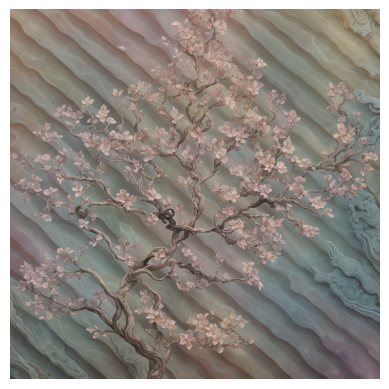

In [336]:
def show_image(img, title=None):
    plt.axis('off')
    if title is not None: plt.title(title)
    plt.imshow(img)
    plt.show()
    
def save_image(img, name):
    result = Image.fromarray(img.astype(np.uint8))
    result.save(Path().absolute().parent.joinpath("result").joinpath(name))

show_image(image)

1.5531579e-07 0.87517124
1.7746903e-07 1.0
0.0 1.0


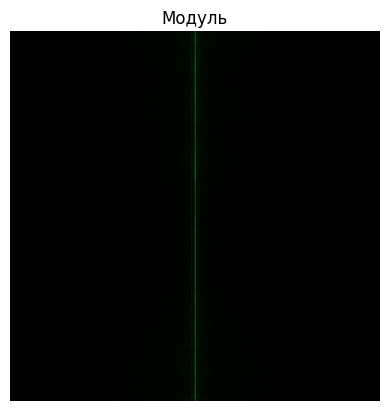

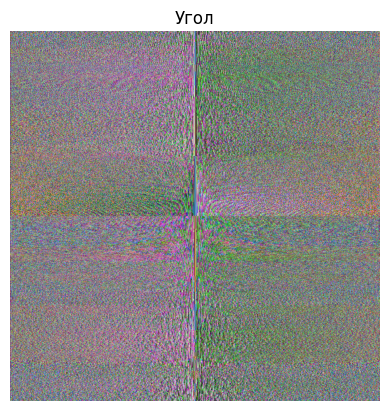

In [337]:
image = image / 255

image_f = fftshift(fft2(image))

image_f_abs = np.log10(1 + np.abs(image_f))
image_f_max_val = image_f_abs.max()
print(image_f_abs.min(), image_f_abs.max())

image_f_abs /= image_f_max_val
print(image_f_abs.min(), image_f_abs.max())
save_image(image_f_abs, "abs_modified.png")

image_f_arg = np.angle(image_f)
image_f_arg_norm = (image_f_arg - image_f_arg.min()) / (image_f_arg.max() - image_f_arg.min())
print(image_f_arg_norm.min(), image_f_arg_norm.max())

show_image(image_f_abs, "Модуль")
show_image(image_f_arg_norm, "Угол")

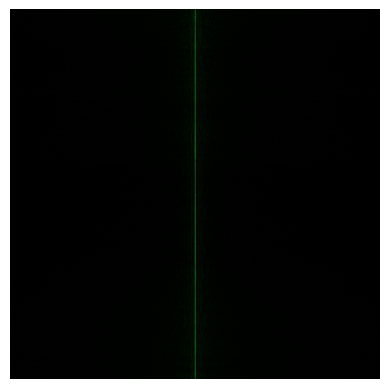

In [338]:
abs_f_modified: np.ndarray = plt.imread(
    Path().absolute().parent
    .joinpath('data').joinpath('lab6').joinpath("abs_m_2.png")
)[:, :, :3]
show_image(abs_f_modified)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..6.5018997].


0.0 1.0
0.0 6.5018997


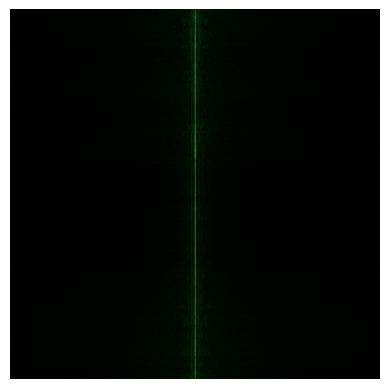

-3.1415927 3.1415927


In [339]:
print(abs_f_modified.min(), abs_f_modified.max())
abs_f_modified_l = 10 ** (abs_f_modified * image_f_max_val) - 1
print(abs_f_modified_l.min(), abs_f_modified_l.max())
show_image(abs_f_modified_l)
print(image_f_arg.min(), image_f_arg.max())
f_restored = abs_f_modified_l * np.exp(1j * image_f_arg)

In [340]:
restored = ifft2(ifftshift(f_restored))

(0.00027766288+7.001171e-06j) (0.003680298+5.719626e-07j)


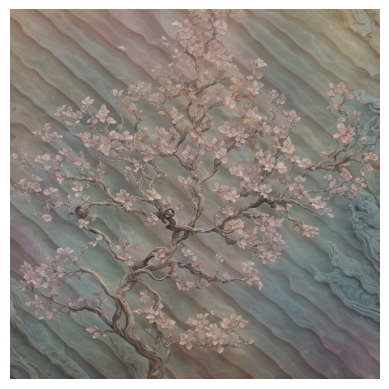

In [341]:
print(restored.min(), restored.max())
show_image(restored.real * 255)